In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import os

## Import Player Attributes

In [2]:
f_path = os.getcwd() + '/Data/Player_Attributes.csv'
attributes = pd.read_csv(f_path).dropna()
attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 42 columns):
id                     180354 non-null int64
player_fifa_api_id     180354 non-null int64
player_api_id          180354 non-null int64
date                   180354 non-null object
overall_rating         180354 non-null float64
potential              180354 non-null float64
preferred_foot         180354 non-null object
attacking_work_rate    180354 non-null object
defensive_work_rate    180354 non-null object
crossing               180354 non-null float64
finishing              180354 non-null float64
heading_accuracy       180354 non-null float64
short_passing          180354 non-null float64
volleys                180354 non-null float64
dribbling              180354 non-null float64
curve                  180354 non-null float64
free_kick_accuracy     180354 non-null float64
long_passing           180354 non-null float64
ball_control           180354 non-null float64
accele

In [5]:
# Adjust these parameters if you would like
training_index = int(len(attributes)*0.75)
print(training_index)

# y is the overall rating, X are all the attributes above that are float64 (excluding potential)
y = attributes['overall_rating'].values[:training_index]
X = attributes.loc[:,'crossing':'gk_reflexes'].values[:training_index]
new_X = attributes.loc[:,'crossing':'gk_reflexes'].values[training_index:]
actual_y = attributes['overall_rating'].values[training_index:]

135265


## Least-Squares Regression

In [4]:
reg = linear_model.LinearRegression().fit(X,y)
print(reg.score(X,y))
print(reg.coef_)
print(reg.intercept_)

0.7812482776981529
[-0.00816566  0.01639047  0.10126936  0.07126574 -0.00341365 -0.01252466
  0.01336123  0.00871129  0.01916399  0.22763901  0.04465262  0.04491591
 -0.01451053  0.27949033  0.00305294  0.02408825  0.01397348 -0.01771719
  0.06353337 -0.01892841  0.01216687  0.01695998 -0.02270239  0.00950808
  0.01468832  0.03755739  0.01370631 -0.03313867  0.20111741  0.05608649
 -0.02868339  0.07958841  0.04417634]
6.101419716919189


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


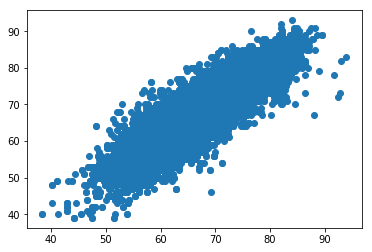

In [7]:
reg_predictions = reg.predict(new_X)
plt.plot(reg_predictions, actual_y, 'o')
plt.show()

## Ridge Regression

In [9]:
ridge = linear_model.Ridge(alpha=1000.0)
ridge.fit(X,y)
print(ridge.score(X,y))
print(ridge.coef_)
print(ridge.intercept_)

0.7812482727374767
[-0.00816354  0.01638919  0.10126402  0.07128022 -0.00341034 -0.01249665
  0.01336286  0.00871006  0.01916993  0.2275617   0.04464855  0.04491208
 -0.01450126  0.27946552  0.00304833  0.02409021  0.01397987 -0.01771368
  0.06353856 -0.01892593  0.01217069  0.01696053 -0.02269728  0.00951257
  0.01469152  0.03755042  0.01370572 -0.0331323   0.20106993  0.05609472
 -0.02868861  0.07958053  0.0442109 ]
6.103383033023697


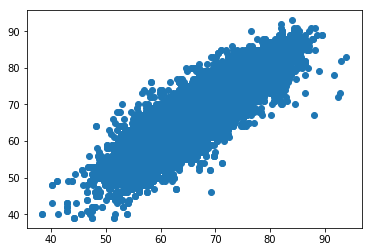

In [10]:
ridge_predictions = ridge.predict(new_X)
plt.plot(ridge_predictions, actual_y, 'o')
plt.show()

## Lasso Regression

In [11]:
lasso = linear_model.Lasso(alpha=1.0)
lasso.fit(X,y)
print(lasso.score(X,y))
print(lasso.coef_)
print(lasso.intercept_)

0.7752609003866033
[-0.          0.          0.0945327   0.05789831  0.          0.
  0.00216089  0.00221289  0.01912821  0.20256247  0.02543527  0.02752366
 -0.          0.29262461  0.          0.01727147  0.01017984 -0.
  0.06275877 -0.          0.00776394  0.01112129 -0.0034744   0.
  0.00933173  0.01551036  0.         -0.          0.21260004  0.03074647
 -0.00818058  0.05556479  0.02895971]
9.594980737041844


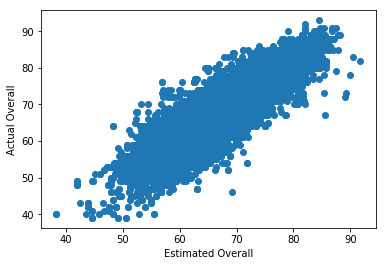

In [18]:
lasso_predictions = lasso.predict(new_X)
plt.plot(lasso_predictions, actual_y, 'o')
plt.xlabel('Estimated Overall')
plt.ylabel('Actual Overall')
plt.savefig('lasso_regression_test.png', transparent=True)

In [14]:
X.shape

(135265, 33)